## 1. Кластеризация

Выбор оптимального количества кластеров 


*Кластерный анализ* (*Data clustering*) — это задача разбиения заданной выборки объектов (ситуаций) на непересекающиеся подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались. Задача кластеризации относится к широкому классу задач обучения без учителя[1].

 То есть мы изначально, решая эту задачу, не знаем правильного количества кластеров. Используемые алгоритмы при этом оставляют выбор количества кластеров за пользователем. При этом, так или иначе, хотелось бы выбрать наиболее оптимальное количество, такое, которое лучше всего описовало бы наши данные.

Пожалуй самым известным и наиболее часто употребимым методом кластеризации является K-means, который стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров, но может быть использована и другая метрика.

Сгененирируем 4 разных распределения точек и применим метод K средних [2].

In [10]:
#импортируем библиотеки

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.cluster import DBSCAN

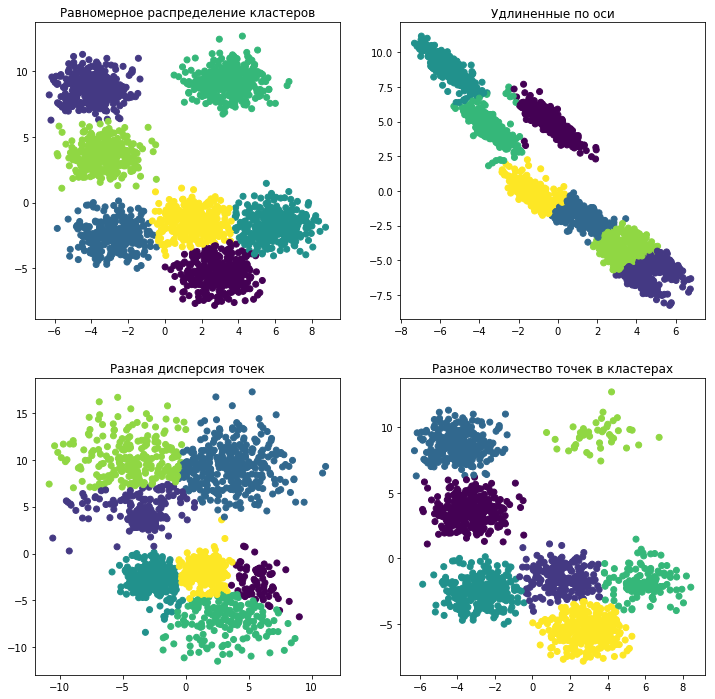

In [26]:



plt.figure(figsize=(12, 12))

n_samples = 2300
random_state = 220
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=7)

# Равномерное распределение кластеров
y_pred = KMeans(n_clusters=7, random_state=random_state, n_jobs = -1).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Равномерное распределение кластеров")

# Удлиненные по одной из оси распределение точек
transformation = [[0.70834549, -0.563667341], [-0.30887718, 0.75253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=7, random_state=random_state).fit_predict(X_aniso)


plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Удлиненные по оси")

# Кластеры разной дисперсии
X_varied, y_varied = make_blobs(n_samples=n_samples, centers=7,                                
                                cluster_std=[1.0, 2.5, 0.5, 3, 0.7, 0.1, 2.3],
                                random_state=random_state)
y_pred = KMeans(n_clusters=7, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Разная дисперсия точек")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:2000], X[y == 1][:500], X[y == 2][:400], X[y == 3][:300],
                       X[y == 4][:200],X[y == 5][:120],X[y == 6][:42]))
y_pred = KMeans(n_clusters=7,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Разное количество точек в кластерах")

plt.show()

Как видим распредение по кластерам оказалось вполне логичным, не смотря на выбор параметров по умолчанию, за исключением второго случая, но там действительно все несколько неочевидно. Но нужно заметить, что мы рассматриваем достаточно простой двухмерный случай, при этом другие алгоритмы кластеризации (их в sklearn достаточно много) могут показать другой и несколько лучший результат.

##  2. Выбор количества кластеров

При выборе количества кластеров, хотелось бы минимизировать некоторый функционал. Если использовать исходную метрику евклидовых расстояних и мы придем в выводу, что суммарная функция ошибки будет минимальна при количестве кластеров равных исходному количеству точек.

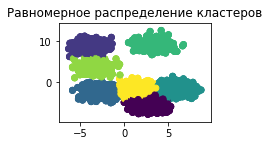

In [30]:
y_pred = KMeans(n_clusters=7, random_state=random_state, n_jobs = -1).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Равномерное распределение кластеров")
plt.show()

http://scikit-learn.org/stable/modules/clustering.html
http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
http://scikit-learn.org/stable/modules/clustering.html#k-means
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

1. Кластеризация http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F
2. K means https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85
2. Sklearn http://scikit-learn.org/stable/modules/clustering.html

In [ ]:
db = DBSCAN(eps=0.35,min_samples=5)
y_pred = db.fit_predict(X_aniso)